In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
rc('font', family='AppleGothic')
from sklearn.linear_model import LinearRegression
import matplotlib.cm as cm
import matplotlib.colors as mcolors
plt.rcParams['axes.unicode_minus'] = False

In [15]:
# # Hermit
# data = {
#     "사냥터명": ["구름공원6", "월하죽림3", "망용둥좌2", "망용둥우1", "망용둥좌1", "푸켄", "오징어", "불어전", "협동3층", "망둥노씰", "망둥1씰"],
#     "경험치": [90, 75, 420, 470, 470, 360, 345, 350, 460, 375, 400],
#     "사냥수익": [250, 200, 40, 50, 50, 80, 85, 60, 50, 60, 60],
#     "사냥비용": [20, 20, 100, 85, 70, 50, 32, 50, 90, 40 ,120]
# }

# # DataFrame creation
# df = pd.DataFrame(data)
# df

,사냥터명,경험치,사냥수익,사냥비용
0,구름공원6,90,250,20
1,월하죽림3,75,200,20
2,망용둥좌2,420,40,100
3,망용둥우1,470,50,85
4,망용둥좌1,470,50,70
5,푸켄,360,80,50
6,오징어,345,85,32
7,불어전,350,60,50
8,협동3층,460,50,90
9,망둥노씰,375,60,40


In [16]:
# # Crusader
# data = {
#     "사냥터명": ["블와둥좌1", "위용둥좌1", "불어전좌3", "와협옥상", "망둥노씰", "망둥2씰", "오징어5층", "차벌1", "금니"],
#     "경험치": [520, 450, 350, 342, 410, 530, 345, 30, 32],
#     "순수익": [-50, -220, -45, -40, -25, -110, 10, 100, 120]
# }

# # DataFrame creation
# df = pd.DataFrame(data)
# df

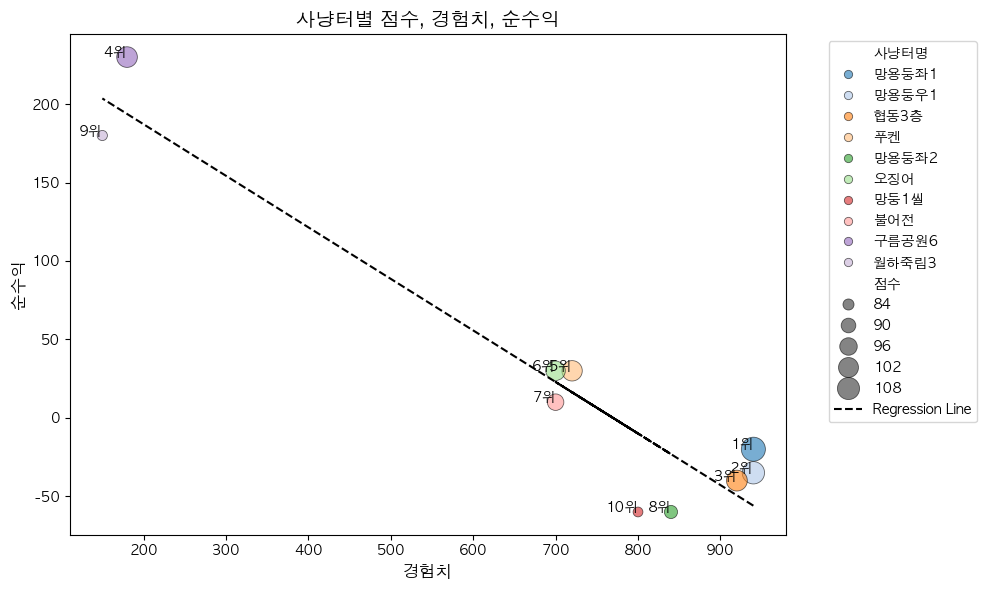

In [27]:
def compare_exp_profit(df):
    # Calculate 순수익 (Net Profit)
    if '순수익' not in df.columns:
        df['순수익'] = df['사냥수익'] - df['사냥비용']
    
    # Normalize Experience and Net Profit
    df['경험치_정규화'] = (df['경험치'] - df['경험치'].min()) / (df['경험치'].max() - df['경험치'].min()) * 100
    df['순수익_정규화'] = (df['순수익'] - df['순수익'].min()) / (df['순수익'].max() - df['순수익'].min()) * 100
    
    # Calculate score: The higher the experience and net profit, the higher the score
    df['점수'] = df['경험치_정규화'] + df['순수익_정규화']
    
    # Rank the maps based on their score
    df['순위'] = df['점수'].rank(ascending=False)
    
    # Set up the color palette using Seaborn
    palette = sns.color_palette("tab20", n_colors=len(df))
    
    # Linear Regression: Experience vs Net Profit
    X = df[['경험치']]  # Experience
    y = df['순수익']   # Net Profit
    
    # Create a Linear Regression model
    regressor = LinearRegression()
    
    # Fit the model to the data
    regressor.fit(X, y)
    
    # Predict the values using the regression model
    y_pred = regressor.predict(X)
    
    # Visualization using Seaborn's scatterplot with hue
    plt.figure(figsize=(10, 6))
    
    # Plot: x = 경험치, y = 순수익
    sns.scatterplot(data=df, 
                    x='경험치', 
                    y='순수익', 
                    size='점수',  # Size of the dot based on 점수 (scaled)
                    hue='사냥터명',  # Hue based on the map name (사냥터명)
                    palette=palette,  # Use categorical color palette
                    sizes=(50, 300),  # Range of dot sizes
                    edgecolor='black', alpha=0.6)
    
    # Plot the regression line
    plt.plot(df['경험치'], y_pred, color='black', linestyle='--', label="Regression Line")
    
    # Add score and ranking labels next to each point
    for i, row in df.iterrows():
        plt.text(row['경험치'], row['순수익'], f"{int(row['순위'])}위", 
                 fontsize=10, ha='right', color='black')
    
    # Add title and labels
    plt.title('사냥터별 점수, 경험치, 순수익', fontsize=14)
    plt.xlabel('경험치', fontsize=12)
    plt.ylabel('순수익', fontsize=12)
    
    # Show the legend for map names only
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Show plot
    plt.tight_layout()
    plt.show()
    
    df = df.drop(columns=['경험치_정규화', '순수익_정규화']).sort_values(by='순위')
# compare_exp_profit(df)

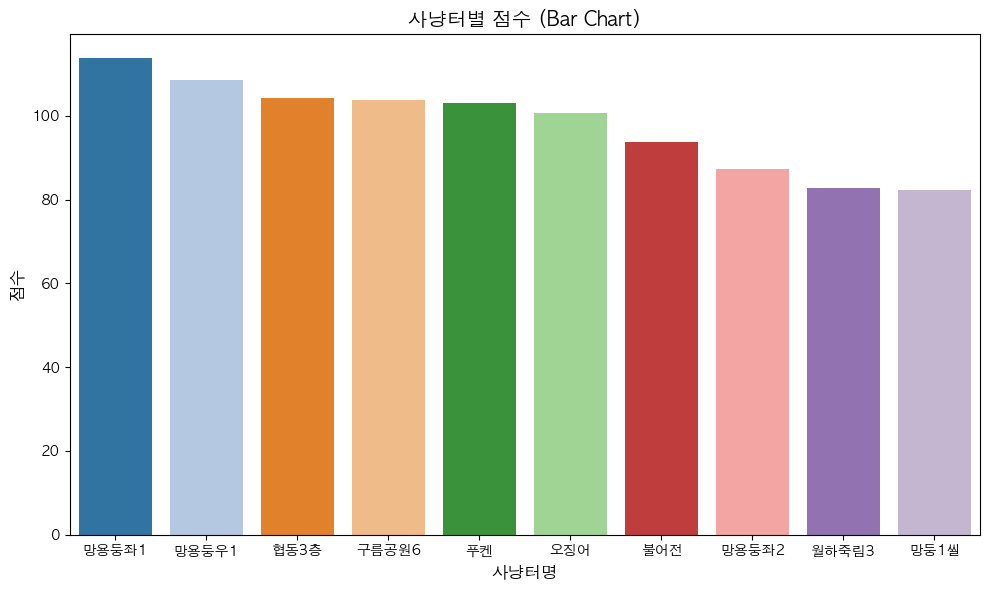

In [29]:
def visualize_efficiency(df):
    df = df.sort_values(by='점수', ascending=False)
    # Visualization using Seaborn's barplot
    plt.figure(figsize=(10, 6))
    
    # Set up the color palette using Seaborn
    palette = sns.color_palette("tab20", n_colors=len(df))
    
    # Bar chart: x = 사냥터명 (map name), y = 점수 (score)
    sns.barplot(data=df, 
                x='사냥터명', 
                y='점수',  # The scores on the y-axis
                palette=palette,  # Color palette for distinct map colors
                ci=None)  # Disable confidence intervals
    
    # Add title and labels
    plt.title('사냥터별 점수 (Bar Chart)', fontsize=14)
    plt.xlabel('사냥터명', fontsize=12)
    plt.ylabel('점수', fontsize=12)
    
    # Show plot
    plt.tight_layout()
    plt.show()
# visualize_efficiency(df)

In [19]:
# # Sample Data
# data = {
#     "사냥터명": ["구름공원6", "월하죽림3", "망용둥좌2", "망용둥우1", "망용둥좌1", "푸켄", "오징어", "불어전", "협동3층", "망둥1씰"],
#     "경험치": [90, 75, 420, 470, 470, 360, 350, 350, 460, 400],
#     "사냥수익": [250, 200, 40, 50, 50, 80, 70, 60, 50, 60],
#     "사냥비용": [20, 20, 100, 85, 70, 50, 40, 50, 90, 120]
# }

# # DataFrame creation
# df = pd.DataFrame(data)
# df["경험치"] = df["경험치"]*2
# df

,사냥터명,경험치,사냥수익,사냥비용
0,구름공원6,180,250,20
1,월하죽림3,150,200,20
2,망용둥좌2,840,40,100
3,망용둥우1,940,50,85
4,망용둥좌1,940,50,70
5,푸켄,720,80,50
6,오징어,700,70,40
7,불어전,700,60,50
8,협동3층,920,50,90
9,망둥1씰,800,60,120


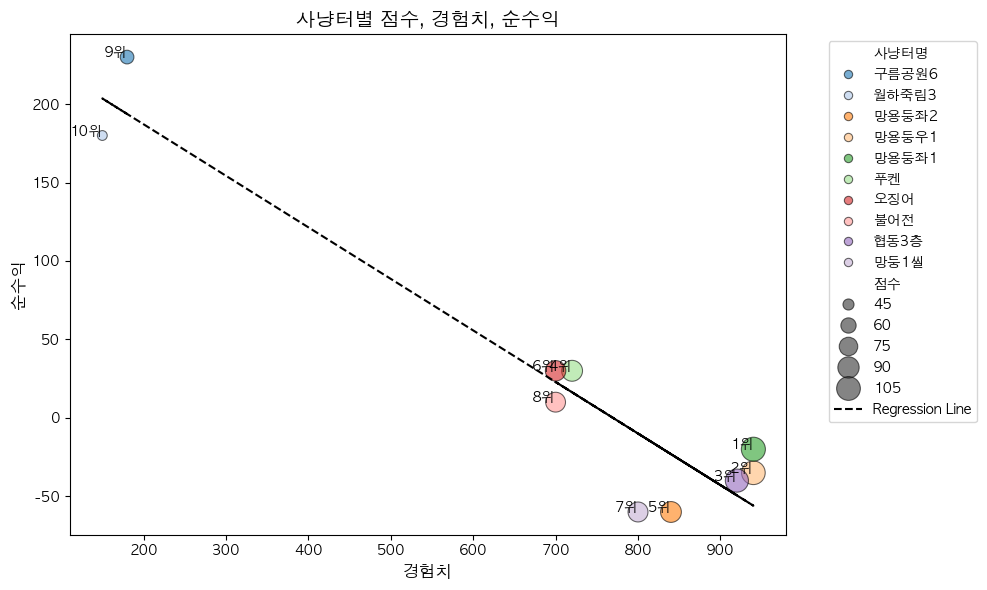

,사냥터명,경험치,사냥수익,사냥비용,순수익,점수,순위
4,망용둥좌1,940,50,70,-20,106.896552,1.0
3,망용둥우1,940,50,85,-35,104.310345,2.0
8,협동3층,920,50,90,-40,100.916630,3.0
5,푸켄,720,80,50,30,87.669140,4.0
2,망용둥좌2,840,40,100,-60,87.341772,5.0
6,오징어,700,70,40,30,85.137495,6.0
9,망둥1씰,800,60,120,-60,82.278481,7.0
7,불어전,700,60,50,10,81.689219,8.0
0,구름공원6,180,250,20,230,53.797468,9.0
1,월하죽림3,150,200,20,180,41.379310,10.0


In [20]:
# # Calculate 순수익 (Net Profit)
# df['순수익'] = df['사냥수익'] - df['사냥비용']

# # Normalize Experience and Net Profit
# df['경험치_정규화'] = (df['경험치'] - df['경험치'].min()) / (df['경험치'].max() - df['경험치'].min()) * 100
# df['순수익_정규화'] = (df['순수익'] - df['순수익'].min()) / (df['순수익'].max() - df['순수익'].min()) * 50

# # Calculate score: The higher the experience and net profit, the higher the score
# df['점수'] = df['경험치_정규화'] + df['순수익_정규화']

# # Rank the maps based on their score
# df['순위'] = df['점수'].rank(ascending=False)

# # Set up the color palette using Seaborn
# palette = sns.color_palette("tab20", n_colors=len(df))

# # Linear Regression: Experience vs Net Profit
# X = df[['경험치']]  # Experience
# y = df['순수익']   # Net Profit

# # Create a Linear Regression model
# regressor = LinearRegression()

# # Fit the model to the data
# regressor.fit(X, y)

# # Predict the values using the regression model
# y_pred = regressor.predict(X)

# # Visualization using Seaborn's scatterplot with hue
# plt.figure(figsize=(10, 6))

# # Plot: x = 경험치, y = 순수익
# sns.scatterplot(data=df, 
#                 x='경험치', 
#                 y='순수익', 
#                 size='점수',  # Size of the dot based on 점수 (scaled)
#                 hue='사냥터명',  # Hue based on the map name (사냥터명)
#                 palette=palette,  # Use categorical color palette
#                 sizes=(50, 300),  # Range of dot sizes
#                 edgecolor='black', alpha=0.6)

# # Plot the regression line
# plt.plot(df['경험치'], y_pred, color='black', linestyle='--', label="Regression Line")

# # Add score and ranking labels next to each point
# for i, row in df.iterrows():
#     plt.text(row['경험치'], row['순수익'], f"{int(row['순위'])}위", 
#              fontsize=10, ha='right', color='black')

# # Add title and labels
# plt.title('사냥터별 점수, 경험치, 순수익', fontsize=14)
# plt.xlabel('경험치', fontsize=12)
# plt.ylabel('순수익', fontsize=12)

# # Show the legend for map names only
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show plot
# plt.tight_layout()
# plt.show()

# df = df.drop(columns=['경험치_정규화', '순수익_정규화']).sort_values(by='순위')
# df